In [29]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import uniform
from numpy.random import normal
import statsmodels.api as sm
%matplotlib inline

C:\Python64\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
X = uniform(0, 1, 100)
Y = np.sin(12*(X+0.2))/(X+0.2) + normal(0, 1, 100)
x = np.linspace(0, 1, 100)
y = np.sin(12*(x+0.2))/(x+0.2)

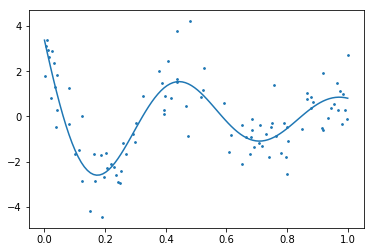

In [23]:
plt.plot(x, y)
plt.scatter(X, Y, s=3)

In [24]:
def dk(x, xi_k, xi_K):
    return (max(0, x-xi_k)**3) / (xi_K-xi_k)

def do_nc_expansion(x, xis):
    X = np.zeros(shape=(x.shape[0], len(xis)))
    for i in range(X.shape[0]):
        X[i, 0] = 1
        X[i, 1] = x[i]
        for k in range(2, len(xis)):
            X[i, k] = dk(x[i], xis[k-2], xis[-1]) - dk(x[i], xis[-2], xis[-1])
    return X

In [26]:
X_unique = np.unique(X)
N = do_nc_expansion(X, X_unique)

In [61]:
ls = sm.OLS(Y, N).fit_regularized(alpha=0.000000000000001, L1_wt=0)
y_hat = ls.predict(do_nc_expansion(x, X_unique))

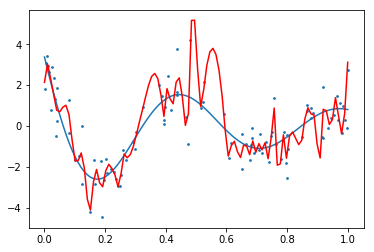

In [62]:
plt.plot(x, y)
plt.scatter(X, Y, s=3)
plt.plot(x, y_hat, color='red')

In [63]:
def a_ij(i, j, a):
    return (a[-1]-a[i]) * (a[-1]-a[j])
def integral_formula(x, i, j, a):
    return (1/a_ij(i, j, a)) * (1/3*(x**3) - 1/2*(x**2)*(a[i]+a[j])+x*a[i]*a[j])
def integral_value(i, j, a):
    xs, xf = a[max(i, j)], a[-1]
    return integral_formula(xf, i, j, a) - integral_formula(xs, i, j, a)
def N_ij(i, j, k, a):
    return 36*(integral_value(i, j, a) - integral_value(i, k-1, a) - integral_value(j, k-1, a) + integral_value(k-1, k-1, a))

In [64]:
def calc_O(x_unique, N):
    O = np.zeros(shape=(N.shape[1], N.shape[1]))
    k = x_unique.shape[0]-1
    for i in range(O.shape[0]):
        for j in range(O.shape[1]):
            if i <= 1 or j <= 1:
                continue
            O[i, j] = N_ij(i-2, j-2, k, x_unique)    
    return O

In [65]:
O = calc_O(X_unique, N)

In [104]:
theta_hat = np.linalg.inv(N.T @ N + 0.000034*O) @ N.T @ Y
y_hat = do_nc_expansion(x, X_unique) @ theta_hat

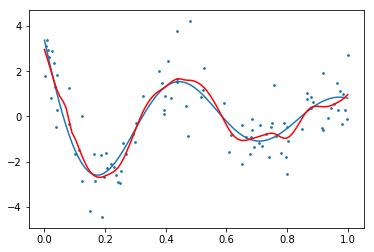

In [105]:
plt.plot(x, y)
plt.scatter(X, Y, s=3)
plt.plot(x, y_hat, color='red')

In [84]:
Sl = N @ np.linalg.inv(N.T @ N + 0.0061*O) @ N.T
np.trace(Sl)

5.017894301275105

In [93]:
Sl = N @ np.linalg.inv(N.T @ N + 0.00034*O) @ N.T
np.trace(Sl)

9.057584073182664

In [106]:
Sl = N @ np.linalg.inv(N.T @ N + 0.000034*O) @ N.T
np.trace(Sl)

15.011726726924048

In [110]:
np.diag(Sl @ Sl.T)

array([0.09258145, 0.19224944, 0.13758168, 0.11165607, 0.17633825,
       0.13504857, 0.09073513, 0.19700149, 0.10048406, 0.09208299,
       0.10754281, 0.11504055, 0.11564497, 0.09910014, 0.09116343,
       0.09471646, 0.12806465, 0.21659596, 0.08870921, 0.18457886,
       0.09476561, 0.1054731 , 0.11085661, 0.11416328, 0.09789528,
       0.12033915, 0.11317613, 0.11179683, 0.14123331, 0.11434906,
       0.21671888, 0.09360673, 0.13657762, 0.08937603, 0.10105042,
       0.10930489, 0.12081849, 0.12679546, 0.11102342, 0.19496919,
       0.09698003, 0.09047078, 0.11247931, 0.10941034, 0.1215082 ,
       0.17946865, 0.09067329, 0.0927527 , 0.08913888, 0.08817653,
       0.08114867, 0.08793087, 0.10165486, 0.13108965, 0.10782384,
       0.10390667, 0.11174658, 0.123597  , 0.11770743, 0.0793091 ,
       0.15463973, 0.0911361 , 0.19266337, 0.12285891, 0.07988136,
       0.14571248, 0.10085888, 0.12960285, 0.08884395, 0.10761809,
       0.08816859, 0.11281405, 0.15032899, 0.13691506, 0.22716